In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SK', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

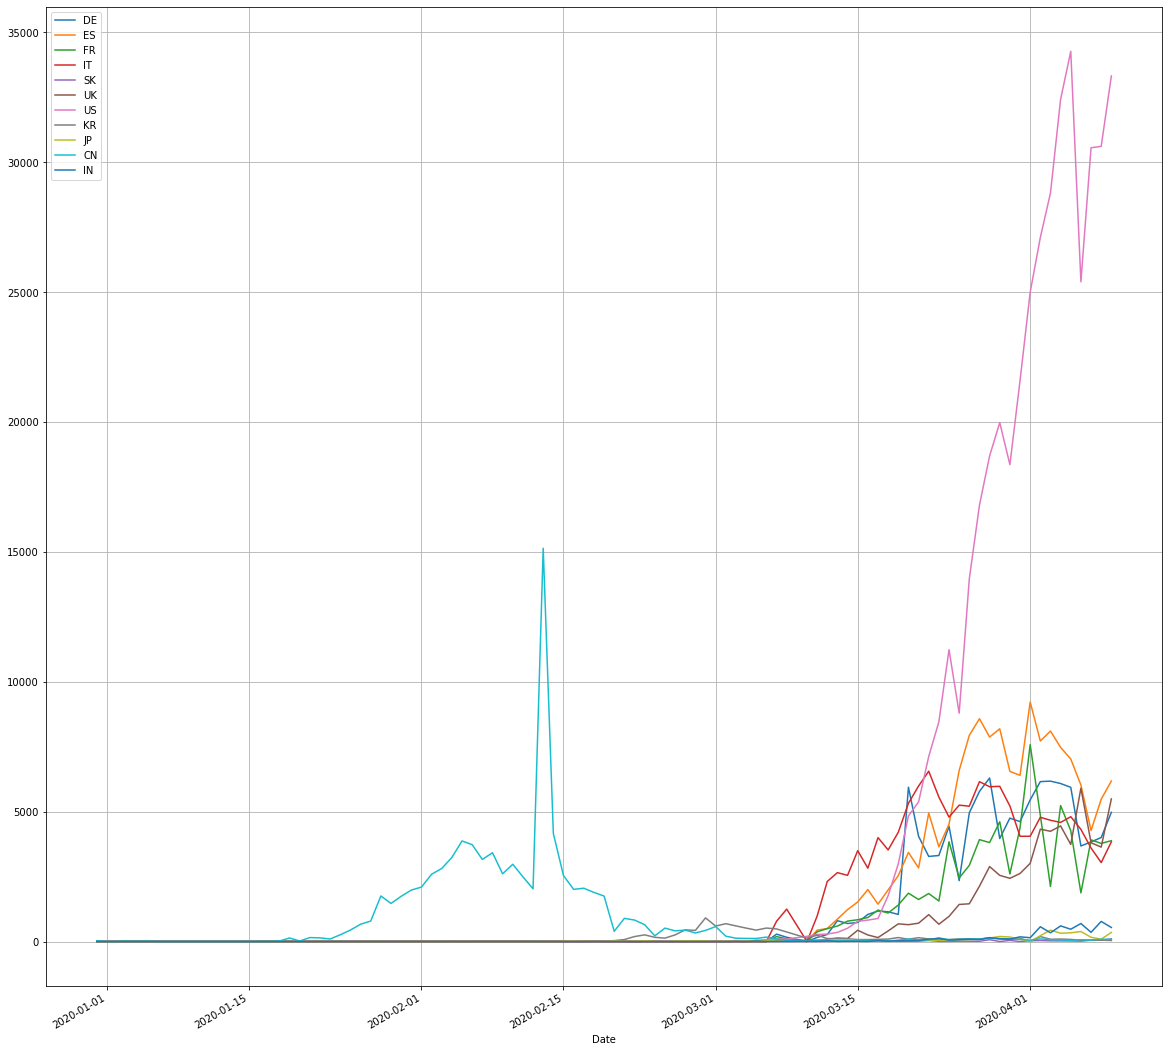

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

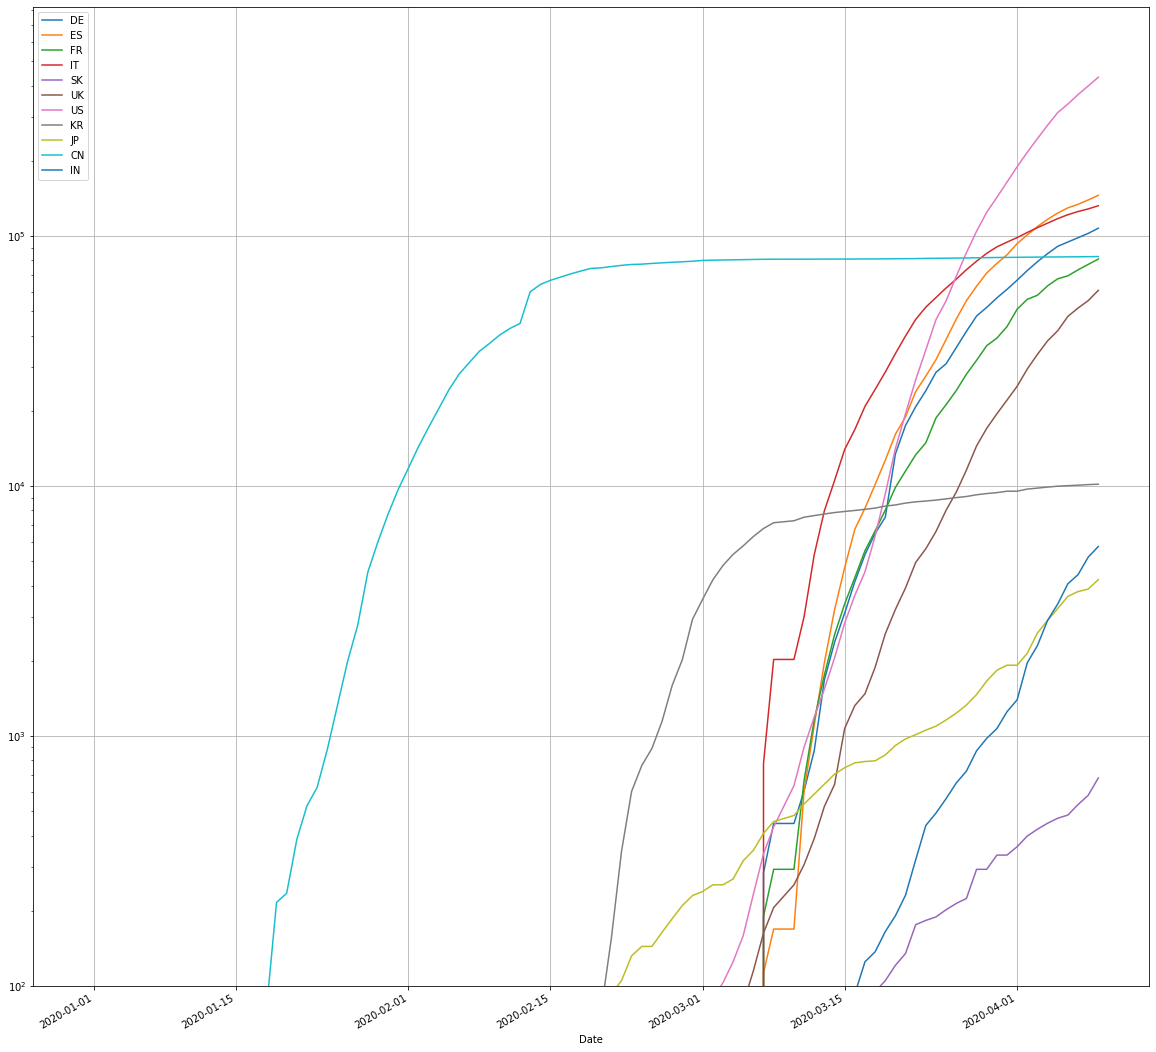

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

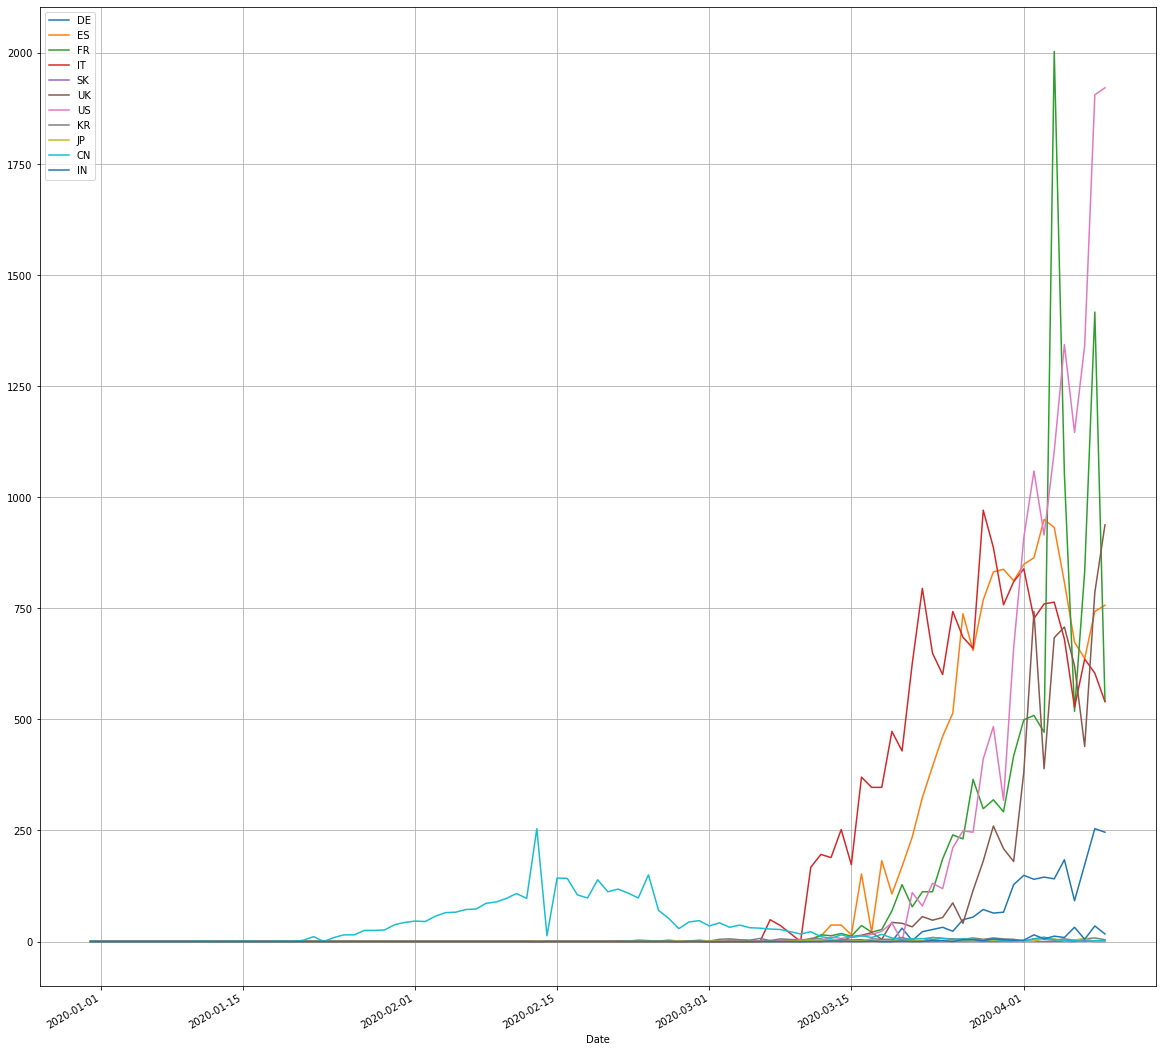

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

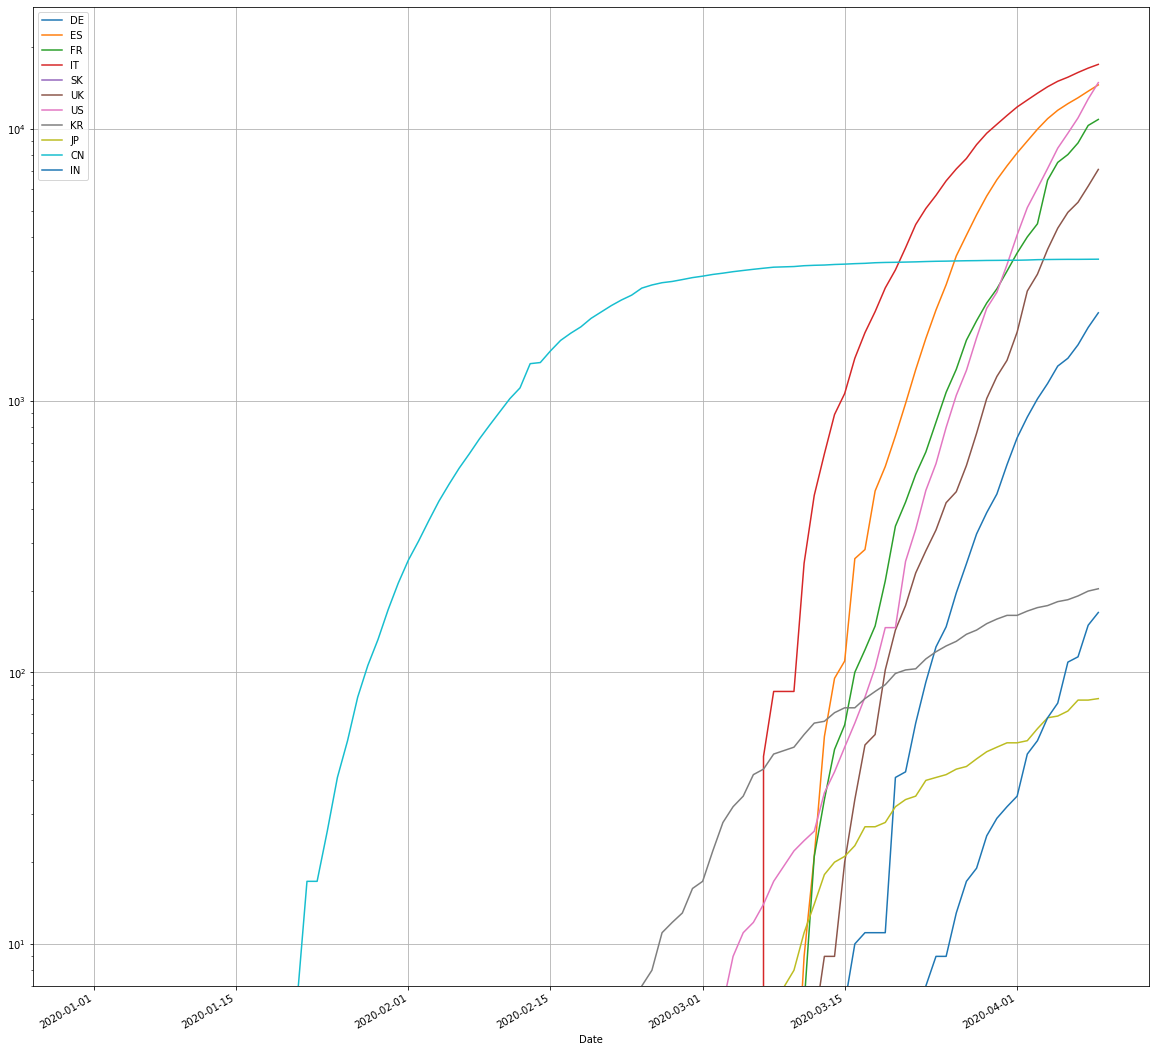

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
14,2020-03-26,4954.0,7937.0,2931.0,5210.0,12.0,1452,13963,104,75,102,87
13,2020-03-27,5780.0,8578.0,3922.0,6153.0,10.0,2129,16797,91,96,94,75
12,2020-03-28,6294.0,7871.0,3809.0,5959.0,69.0,2885,18695,146,135,119,149
11,2020-03-29,3965.0,8189.0,4611.0,5974.0,0.0,2546,19979,105,194,113,106
10,2020-03-30,4751.0,6549.0,2599.0,5217.0,41.0,2433,18360,78,173,98,92
9,2020-03-31,4615.0,6398.0,4376.0,4050.0,0.0,2619,21595,125,87,84,180
8,2020-04-01,5453.0,9222.0,7578.0,4053.0,27.0,3009,24998,0,0,54,146
7,2020-04-02,6156.0,7719.0,4861.0,4782.0,37.0,4324,27103,190,225,100,568
6,2020-04-03,6174.0,8102.0,2116.0,4668.0,26.0,4244,28819,86,439,70,336
5,2020-04-04,6082.0,7472.0,5233.0,4585.0,24.0,4450,32425,94,318,62,601


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-03-26,35816.0,46575.0,24114.0,67239.0,214.0,9462.0,69073.0,8993.0,1235.0,81688.0,649.0
2020-03-27,41596.0,55153.0,28036.0,73392.0,224.0,11591.0,85870.0,9084.0,1331.0,81782.0,724.0
2020-03-28,47890.0,63024.0,31845.0,79351.0,293.0,14476.0,104565.0,9230.0,1466.0,81901.0,873.0
2020-03-29,51855.0,71213.0,36456.0,85325.0,293.0,17022.0,124544.0,9335.0,1660.0,82014.0,979.0
2020-03-30,56606.0,77762.0,39055.0,90542.0,334.0,19455.0,142904.0,9413.0,1833.0,82112.0,1071.0
2020-03-31,61221.0,84160.0,43431.0,94592.0,334.0,22074.0,164499.0,9538.0,1920.0,82196.0,1251.0
2020-04-01,66674.0,93382.0,51009.0,98645.0,361.0,25083.0,189497.0,9538.0,1920.0,82250.0,1397.0
2020-04-02,72830.0,101101.0,55870.0,103427.0,398.0,29407.0,216600.0,9728.0,2145.0,82350.0,1965.0
2020-04-03,79004.0,109203.0,57986.0,108095.0,424.0,33651.0,245419.0,9814.0,2584.0,82420.0,2301.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
14,2020-03-26,49.0,738.0,231.0,685.0,0.0,41,249,5,2,6,4
13,2020-03-27,55.0,655.0,365.0,660.0,0.0,115,246,8,1,5,4
12,2020-03-28,72.0,769.0,299.0,971.0,0.0,181,411,5,3,3,2
11,2020-03-29,64.0,832.0,319.0,887.0,0.0,260,484,8,3,5,6
10,2020-03-30,66.0,838.0,292.0,758.0,0.0,209,318,6,2,2,4
9,2020-03-31,128.0,812.0,418.0,810.0,0.0,180,661,5,2,3,3
8,2020-04-01,149.0,849.0,499.0,839.0,0.0,381,909,0,0,1,3
7,2020-04-02,140.0,864.0,509.0,727.0,0.0,743,1059,6,1,6,15
6,2020-04-03,145.0,950.0,471.0,760.0,0.0,389,915,5,6,10,6
5,2020-04-04,141.0,932.0,2004.0,764.0,0.0,684,1104,3,6,4,12


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-03-26,196.0,3408.0,1304.0,7126.0,0.0,462.0,1046.0,130.0,44.0,3268.0,13.0
2020-03-27,251.0,4063.0,1669.0,7786.0,0.0,577.0,1292.0,138.0,45.0,3273.0,17.0
2020-03-28,323.0,4832.0,1968.0,8757.0,0.0,758.0,1703.0,143.0,48.0,3276.0,19.0
2020-03-29,387.0,5664.0,2287.0,9644.0,0.0,1018.0,2187.0,151.0,51.0,3281.0,25.0
2020-03-30,453.0,6502.0,2579.0,10402.0,0.0,1227.0,2505.0,157.0,53.0,3283.0,29.0
2020-03-31,581.0,7314.0,2997.0,11212.0,0.0,1407.0,3166.0,162.0,55.0,3286.0,32.0
2020-04-01,730.0,8163.0,3496.0,12051.0,0.0,1788.0,4075.0,162.0,55.0,3287.0,35.0
2020-04-02,870.0,9027.0,4005.0,12778.0,0.0,2531.0,5134.0,168.0,56.0,3293.0,50.0
2020-04-03,1015.0,9977.0,4476.0,13538.0,0.0,2920.0,6049.0,173.0,62.0,3303.0,56.0
